A CNN Model for CIFAR10 dataset Classification

In [22]:
from tensorflow.keras.datasets.cifar10 import load_data

Load Dataset

In [23]:
(trainX, trainy), (testX, testy)=load_data()

Summarize Loaded Dataset

In [24]:
print('Train: X=%s, y=%s' %(trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' %(testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


Plot first images

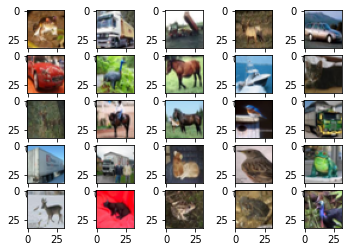

In [25]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(trainX[i])
plt.show()  

In [26]:
trainX=trainX.reshape((trainX.shape[0], trainX.shape[1], trainX.shape[2], 3))
testX=testX.reshape((testX.shape[0], testX.shape[1], testX.shape[2], 3))

Normalize pixel values

In [27]:
from numpy import asarray
trainX= trainX.astype('float32')/255
testX= testX.astype('float32')/255

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

Step1: Define the model

In [29]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', kernel_initializer='he_uniform', input_shape= trainX.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))



Step2: Compile the model

In [30]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics =['accuracy'])


Step3: Fit the model

In [31]:
history = model.fit(x=trainX, y=trainy, epochs=10, batch_size=100, validation_data=(testX, testy))

Epoch 1/10
500/500 [==============================] - 52s 104ms/step - loss: 1.9941 - accuracy: 0.2718 - val_loss: 1.7648 - val_accuracy: 0.3772
Epoch 2/10
500/500 [==============================] - 52s 105ms/step - loss: 1.7244 - accuracy: 0.3816 - val_loss: 1.6148 - val_accuracy: 0.4307
Epoch 3/10
500/500 [==============================] - 52s 105ms/step - loss: 1.6040 - accuracy: 0.4243 - val_loss: 1.5039 - val_accuracy: 0.4659
Epoch 4/10
500/500 [==============================] - 52s 104ms/step - loss: 1.5236 - accuracy: 0.4550 - val_loss: 1.4362 - val_accuracy: 0.4879
Epoch 5/10
500/500 [==============================] - 52s 104ms/step - loss: 1.4632 - accuracy: 0.4772 - val_loss: 1.3937 - val_accuracy: 0.5071
Epoch 6/10
500/500 [==============================] - 52s 105ms/step - loss: 1.4176 - accuracy: 0.4923 - val_loss: 1.3519 - val_accuracy: 0.5215
Epoch 7/10
500/500 [==============================] - 52s 105ms/step - loss: 1.3792 - accuracy: 0.5071 - val_loss: 1.3421 - val_ac

Step4: Evaluate the model

In [33]:
loss, acc = model.evaluate(testX, testy, verbose=2)
print('Accuracy: ', acc*100)
print('Loss: ', loss)

313/313 - 3s - loss: 1.2398 - accuracy: 0.5701
Accuracy:  57.01000094413757
Loss:  1.2397911548614502


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

Model Architecture plot

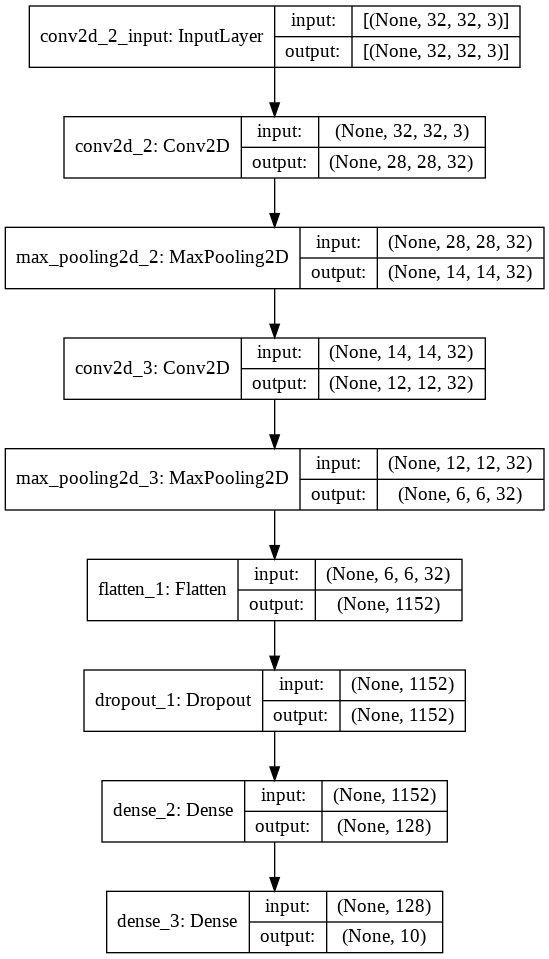

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

Plot Learning Curves

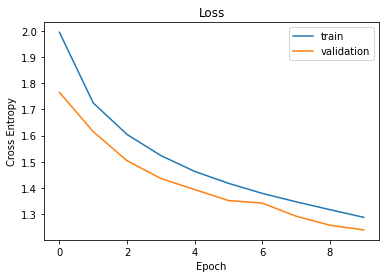

In [37]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

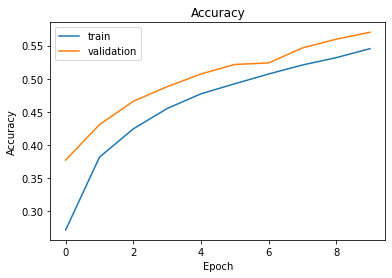

In [38]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()